In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/bt4012/fraud_oracle.csv")

Mounted at /content/drive


In [ ]:
df.shape

(15420, 33)

In [ ]:
df.head(10)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
5,Oct,4,Friday,Honda,Urban,Wednesday,Nov,1,Male,Single,...,5 years,21 to 25,No,No,External,3 to 5,no change,1 vehicle,1994,Collision
6,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,...,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
8,Dec,4,Saturday,Honda,Urban,Wednesday,Dec,5,Male,Single,...,6 years,31 to 35,No,Yes,External,3 to 5,no change,1 vehicle,1994,Collision
9,Apr,3,Tuesday,Ford,Urban,Wednesday,Apr,3,Male,Married,...,more than 7,36 to 40,No,No,External,3 to 5,no change,1 vehicle,1994,All Perils


In [ ]:
# Manually map descriptions
descriptions = {
    "Month": "The month in which the insurance claim was made.",
    "WeekOfMonth": "The week of the month in which the insurance claim was made.",
    "DayOfWeek": "The day of the week on which the insurance claim was made.",
    "Make": "The manufacturer of the vehicle involved in the claim.",
    "AccidentArea": "The area where the accident occurred (e.g., urban, rural).",
    "DayOfWeekClaimed": "The day of the week on which the insurance claim was processed.",
    "MonthClaimed": "The month in which the insurance claim was processed.",
    "WeekOfMonthClaimed": "The week of the month in which the insurance claim was processed.",
    "Sex": "The gender of the policyholder.",
    "MaritalStatus": "The material status of the policyholder.",
    "Age": "The age of the policyholder.",
    "Fault": "Indicates whether the policyholder was at fault in the accident.",
    "PolicyType": "The type of insurance policy (e.g., comprehensive, third-party).",
    "VehicleCategory": "The category of the vehicle (e.g., sedan, SUV).",
    "VehiclePrice": "The price of the vehicle.",
    "FraudFound_P": "Indicates whether fraud was detected in the insurance claim.",
    "PolicyNumber": "The unique identifier for the insurance policy.",
    "RepNumber": "The unique identifier for the insurance representative handling the claim.",
    "Deductible": "The amount that the policy holder must pay out of pocket before the insurance company pays the remaining costs.",
    "DriverRating": "The rating of the driver, often based on driving history or other factors.",
    "Days_Policy_Accident": "The number of days since the policy was issued until the accident occurred.",
    "Days_Policy_Claim": "The number of days since the policy was issued until the claim was made.",
    "PastNumberOfClaims": "The number of claims previously made by the policyholder.",
    "AgeOfVehicle": "The age of the vehicle involved in the claim.",
    "AgeOfPolicyHolder": "The age of the policyholder.",
    "PoliceReportFiled": "Indicates whether a police report was filed for the accident.",
    "WitnessPresent": "Indicates whether a witness was present at the scene of the accident.",
    "AgentType": "The type of insurance agent handling the policy (e.g., internal, external).",
    "NumberOfSuppliments": "The number of supplementary documents or claims related to the main claim, categorized into ranges.",
    "AddressChange_Claim": "Indicates whether the address of the policyholder was changed at the time of the claim, categorized into ranges.",
    "NumberOfCars": "The number of cars insured under the policy, categorized into ranges.",
    "Year": "The year in which the claim was made or processed.",
    "BasePolicy": "The base policy type (e.g., Liability, Collision, All Perils)."
}

# Helper function to infer feature type
def infer_feature_type(series):
    if series.nunique() == 2:
        return "Binary"
    elif pd.api.types.is_numeric_dtype(series):
        if series.nunique() < 10:
            return "Ordinal"
        else:
            return "Numerical"
    else:
        return "Categorical"

# Build summary dataframe
summary = pd.DataFrame({
    "Feature Type": [infer_feature_type(df[col]) for col in df.columns],
    "Unique Values": df.nunique(),
    "Example Value": [df[col].dropna().iloc[0] for col in df.columns],
    "Description": [descriptions.get(col, "No description provided.") for col in df.columns]
})

#display summary
styled = (
    summary.style
    .set_properties(**{"text-align": "left"})             # cells
    .set_table_styles([{"selector": "th", "props": [("text-align", "left")]}])  # headers
)

styled


,Feature Type,Unique Values,Example Value,Description
Month,Categorical,12,Dec,The month in which the insurance claim was made.
WeekOfMonth,Ordinal,5,5,The week of the month in which the insurance claim was made.
DayOfWeek,Categorical,7,Wednesday,The day of the week on which the insurance claim was made.
Make,Categorical,19,Honda,The manufacturer of the vehicle involved in the claim.
AccidentArea,Binary,2,Urban,"The area where the accident occurred (e.g., urban, rural)."
DayOfWeekClaimed,Categorical,8,Tuesday,The day of the week on which the insurance claim was processed.
MonthClaimed,Categorical,13,Jan,The month in which the insurance claim was processed.
WeekOfMonthClaimed,Ordinal,5,1,The week of the month in which the insurance claim was processed.
Sex,Binary,2,Female,The gender of the policyholder.
MaritalStatus,Categorical,4,Single,The material status of the policyholder.


In [ ]:
# Missing Values
missing_count = df.isnull().sum()
missing_pct = missing_count / len(df) * 100

missing_df = pd.DataFrame({'missing_count': missing_count, 'missing_pct': missing_pct})
display(missing_df)

,missing_count,missing_pct
Month,0,0.0
WeekOfMonth,0,0.0
DayOfWeek,0,0.0
Make,0,0.0
AccidentArea,0,0.0
DayOfWeekClaimed,0,0.0
MonthClaimed,0,0.0
WeekOfMonthClaimed,0,0.0
Sex,0,0.0
MaritalStatus,0,0.0


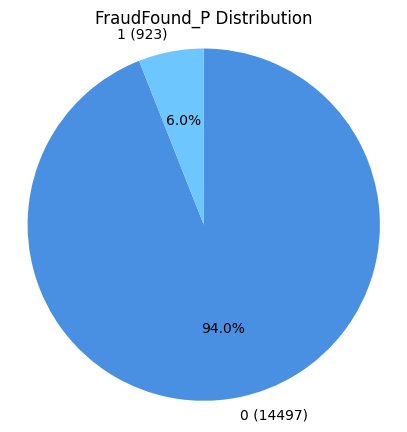

In [ ]:
col = "FraudFound_P"
counts = df[col].value_counts()

plt.figure(figsize=(5,5))
plt.pie(
    counts.values,
    labels=[f"{str(k)} ({v})" for k, v in counts.items()],
    colors=["#4A90E2", "#6EC6FF"],   # ← original palette
    autopct="%1.1f%%",
    startangle=90,
    counterclock=False
)
plt.title("FraudFound_P Distribution")
plt.axis("equal")
plt.show()

/tmp/ipython-input-1957393800.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df["Age"], vert=True, showfliers=True, labels=["Age"])


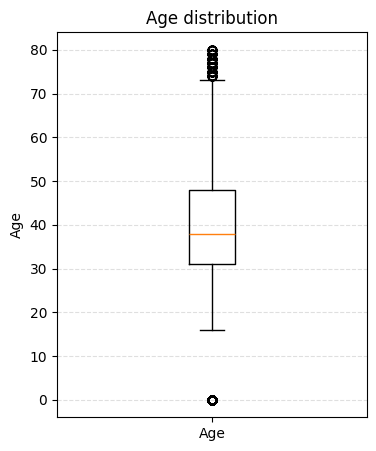

In [ ]:
#Box plot of Age
plt.figure(figsize=(4,5))
plt.boxplot(df["Age"], vert=True, showfliers=True, labels=["Age"])
plt.ylabel("Age")
plt.title("Age distribution")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

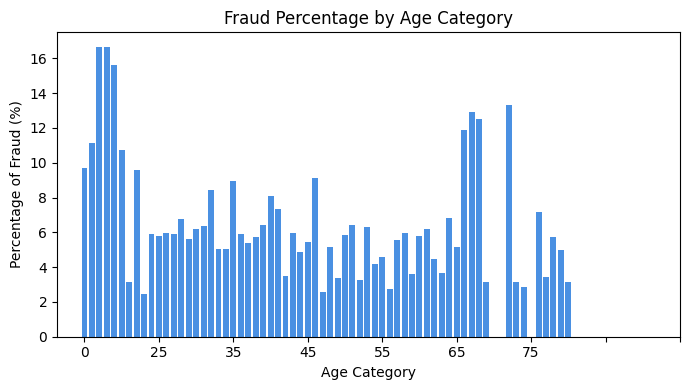

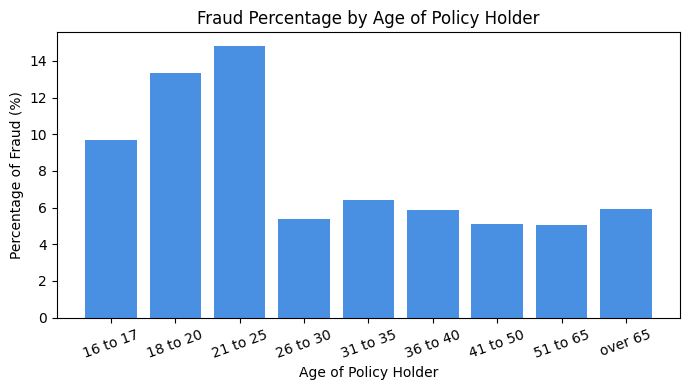

In [ ]:
# Histogram for Fraud Percentage by "Age"
age_col = "Age"
target_col = "FraudFound_P"

fraud_rate_age = (
    df.groupby(age_col)[target_col]
      .mean()
      .sort_index()
)

plt.figure(figsize=(7,4))
plt.bar(
    fraud_rate_age.index.astype(str),
    fraud_rate_age.values * 100,
    color="#4A90E2"
)
plt.xticks(np.arange(0, df[age_col].max()+10, 10))
plt.xlabel("Age Category")
plt.ylabel("Percentage of Fraud (%)")
plt.title("Fraud Percentage by Age Category")
plt.tight_layout()
plt.show()


# Histogram for Fraud Percentage by "AgeOfPolicyHolder"
age_col2 = "AgeOfPolicyHolder"

fraud_rate_age2 = (
    df.groupby(age_col2)[target_col]
      .mean()
      .sort_index()
)

plt.figure(figsize=(7,4))
plt.bar(
    fraud_rate_age2.index.astype(str),
    fraud_rate_age2.values * 100,
    color="#4A90E2"
)
plt.xticks(rotation=20)
plt.xlabel("Age of Policy Holder")
plt.ylabel("Percentage of Fraud (%)")
plt.title("Fraud Percentage by Age of Policy Holder")
plt.tight_layout()
plt.show()


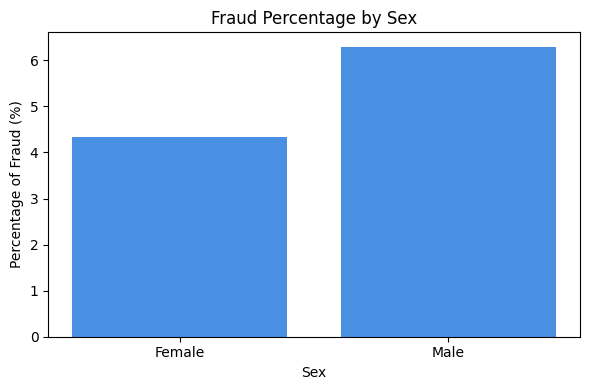

In [ ]:
# Histogram for Fraud Percentage by Sex
sex_col = "Sex"

fraud_rate_sex = (
    df.groupby(sex_col)[target_col]
      .mean()
      .sort_index()
)

plt.figure(figsize=(6,4))
plt.bar(fraud_rate_sex.index.astype(str), fraud_rate_sex.values * 100, color="#4A90E2")
plt.xlabel("Sex")
plt.ylabel("Percentage of Fraud (%)")
plt.title("Fraud Percentage by Sex")
plt.tight_layout()
plt.show()

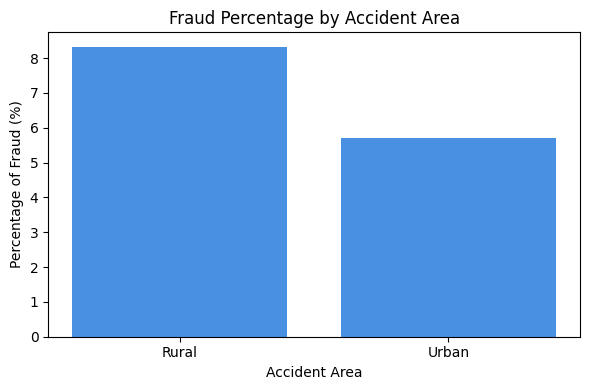

In [ ]:
# Histogram for Fraud Percentage by Accident Area
area_col = "AccidentArea"

fraud_rate_area = (
    df.groupby(area_col)[target_col]
      .mean()
      .sort_index()
)

plt.figure(figsize=(6,4))
plt.bar(fraud_rate_area.index.astype(str), fraud_rate_area.values * 100, color="#4A90E2")
plt.xlabel("Accident Area")
plt.ylabel("Percentage of Fraud (%)")
plt.title("Fraud Percentage by Accident Area")
plt.tight_layout()
plt.show()

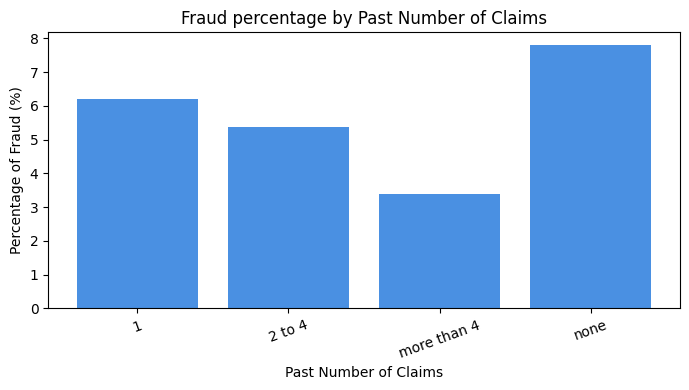

In [ ]:
#Histogram for Past Number of Claims
claims_col = "PastNumberOfClaims"

fraud_rate_claims = (
    df.groupby(claims_col)[target_col]
      .mean()
      .sort_index()
)

plt.figure(figsize=(7,4))
plt.bar(fraud_rate_claims.index.astype(str), fraud_rate_claims.values * 100, color="#4A90E2")
plt.xticks(rotation=20)
plt.xlabel("Past Number of Claims")
plt.ylabel("Percentage of Fraud (%)")
plt.title("Fraud percentage by Past Number of Claims")
plt.tight_layout()
plt.show()

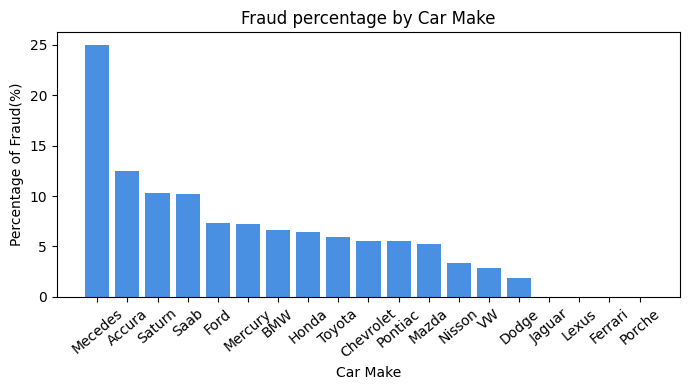

In [ ]:
#Histogram for Fraud Percentage by "Make"
car_make = "Make"

fraud_rate_make = (df.groupby(car_make)[target_col].mean().sort_values(ascending=False))

plt.figure(figsize=(7,4))
plt.bar(fraud_rate_make.index.astype(str), fraud_rate_make.values*100, color="#4A90E2")
plt.xticks(rotation=40)
plt.xlabel("Car Make")
plt.ylabel("Percentage of Fraud(%)")
plt.title("Fraud percentage by Car Make")
plt.tight_layout()
plt.show()

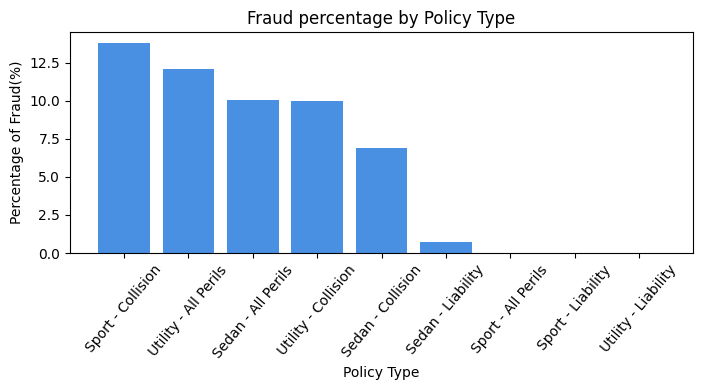

In [ ]:
#Histogram for Fraud Percentage by "PolicyType"
policy_type = "PolicyType"

fraud_rate_policy = (df.groupby(policy_type)[target_col].mean().sort_values(ascending=False))

plt.figure(figsize=(7,4))
plt.bar(fraud_rate_policy.index.astype(str), fraud_rate_policy.values*100, color="#4A90E2")
plt.xticks(rotation=50)
plt.xlabel("Policy Type")
plt.ylabel("Percentage of Fraud(%)")
plt.title("Fraud percentage by Policy Type")
plt.tight_layout()
plt.show()

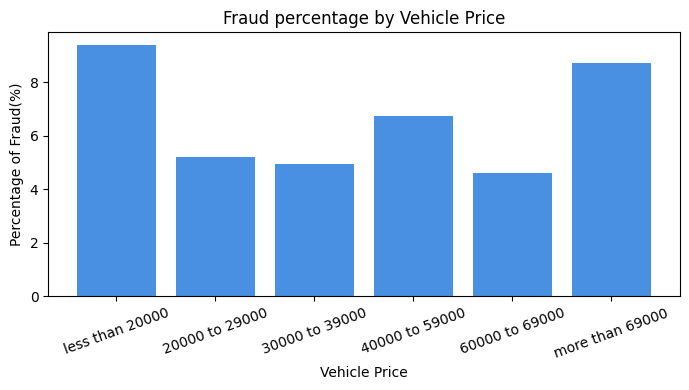

In [ ]:
#Histogram for Fraud Percentage by "VehiclePrice"

car_price = "VehiclePrice"
custom_order=["less than 20000", "20000 to 29000", "30000 to 39000", "40000 to 59000", "60000 to 69000", "more than 69000"]

fraud_rate_price = (df.groupby(car_price)[target_col].mean().sort_index())
fraud_rate_price = fraud_rate_price.reindex(custom_order)

plt.figure(figsize=(7,4))
plt.bar(fraud_rate_price.index.astype(str), fraud_rate_price.values*100, color="#4A90E2")
plt.xticks(rotation=20)
plt.xlabel("Vehicle Price")
plt.ylabel("Percentage of Fraud(%)")
plt.title("Fraud percentage by Vehicle Price")
plt.tight_layout()
plt.show()

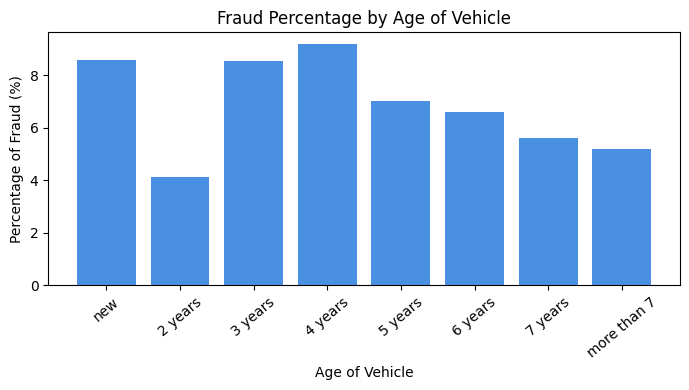

In [ ]:
#Histogram for Fraud Percentage by "AgeOfVehicle"

vehicle_age_col = "AgeOfVehicle"
custom_order=["new", "2 years", "3 years", "4 years", "5 years", "6 years", "7 years", "more than 7"]

fraud_rate_vehicle_age = (
    df.groupby(vehicle_age_col)[target_col]
      .mean()
      .sort_index()
)

fraud_rate_vehicle_age = fraud_rate_vehicle_age.reindex(custom_order)

plt.figure(figsize=(7,4))
plt.bar(
    fraud_rate_vehicle_age.index.astype(str),
    fraud_rate_vehicle_age.values * 100,
    color="#4A90E2"
)
plt.xticks(rotation=40)
plt.xlabel("Age of Vehicle")
plt.ylabel("Percentage of Fraud (%)")
plt.title("Fraud Percentage by Age of Vehicle")
plt.tight_layout()
plt.show()

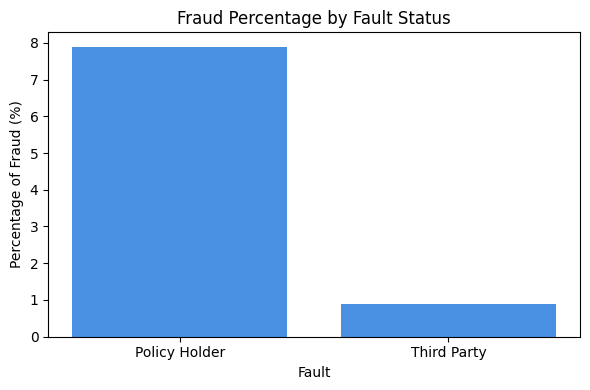

In [35]:
# Histogram for Fraud Percentage by Fault
fault_col = "Fault"   # assumes values like 'Policy Holder' vs 'Third Party' or 0/1
target_col = "FraudFound_P"

fraud_rate_fault = (
    df.groupby(fault_col)[target_col]
      .mean()
      .sort_index()
)

plt.figure(figsize=(6,4))
plt.bar(fraud_rate_fault.index.astype(str), fraud_rate_fault.values * 100, color="#4A90E2")
plt.xlabel("Fault")
plt.ylabel("Percentage of Fraud (%)")
plt.title("Fraud Percentage by Fault Status")
plt.tight_layout()
plt.show()


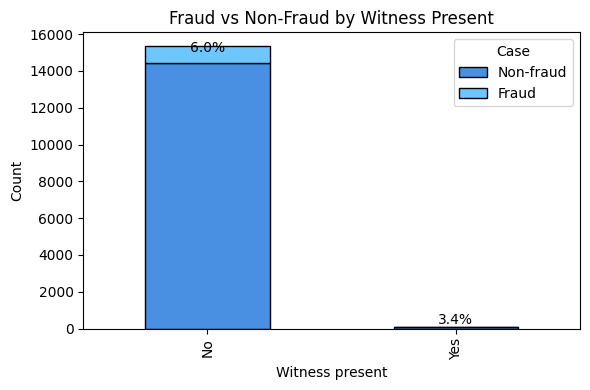

In [ ]:
#Stacked Bar Chart for "WitnessPresent"
colors = ["#4A90E2", "#6EC6FF"]
witness_col = "WitnessPresent"
cross_witness = pd.crosstab(df[witness_col], df[target_col])

cross_witness.columns = ["Non-fraud" if c==0 else "Fraud" for c in cross_witness.columns]

fraud_pct = cross_witness["Fraud"] / cross_witness.sum(axis=1) * 100

# Plot stacked bar
cross_witness.plot(
    kind="bar",
    stacked=True,
    figsize=(6,4),
    edgecolor="black",
    color=colors   # <--- add this
)

plt.title("Fraud vs Non-Fraud by Witness Present")
plt.xlabel("Witness present")
plt.ylabel("Count")
plt.legend(title="Case")

for i, (total, fraud, pct) in enumerate(zip(cross_witness.sum(axis=1), cross_witness["Fraud"], fraud_pct)):
    plt.text(i, total - fraud/2, f"{pct:.1f}%", ha="center", va="bottom")

plt.tight_layout()
plt.show()

In [ ]:
cross_witness

,Non-fraud,Fraud
WitnessPresent,,
No,14413,920
Yes,84,3


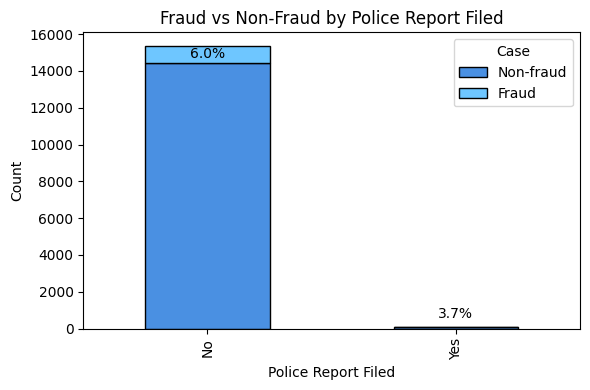

In [ ]:
#Stacked Bar Chart for "PoliceReportFiled"
police_col = "PoliceReportFiled"
cross_police = pd.crosstab(df[police_col], df[target_col])

cross_police.columns = ["Non-fraud" if c==0 else "Fraud" for c in cross_police.columns]

fraud_pct = cross_police["Fraud"] / cross_police.sum(axis=1) * 100

# Plot stacked bar
cross_witness.plot(
    kind="bar",
    stacked=True,
    figsize=(6,4),
    edgecolor="black",
    color=colors   # <--- add this
)

plt.title("Fraud vs Non-Fraud by Police Report Filed")
plt.xlabel("Police Report Filed")
plt.ylabel("Count")
plt.legend(title="Case")

for i, (total, fraud, pct) in enumerate(zip(cross_police.sum(axis=1), cross_police["Fraud"], fraud_pct)):
    plt.text(i, total - fraud/2, f"{pct:.1f}%", ha="center", va="bottom")

plt.tight_layout()
plt.show()

In [ ]:
cross_police

,Non-fraud,Fraud
PoliceReportFiled,,
No,14085,907
Yes,412,16
